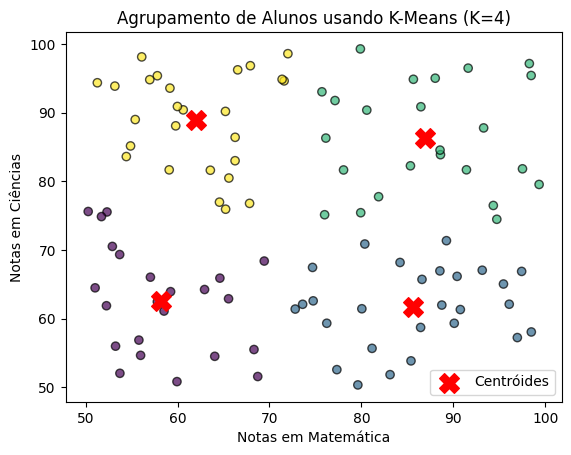

Número ideal de clusters: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Gerando dados fictícios
np.random.seed(42)
n_students = 100
math_scores = np.random.uniform(50, 100, n_students)
science_scores = np.random.uniform(50, 100, n_students)
data = np.column_stack((math_scores, science_scores))

# Determinando o número ideal de clusters usando o método da silhueta
silhouette_scores = []
k_values = range(2, 6)  # Testando de 2 a 5 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

best_k = k_values[np.argmax(silhouette_scores)]

# Aplicando K-Means com o melhor número de clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data)

# Visualizando os clusters
plt.scatter(math_scores, science_scores, c=clusters, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centróides')
plt.xlabel('Notas em Matemática')
plt.ylabel('Notas em Ciências')
plt.title(f'Agrupamento de Alunos usando K-Means (K={best_k})')
plt.legend()
plt.show()

print(f'Número ideal de clusters: {best_k}')